# **AirBnB housing price prediction**

INFO 370 Problem Set 6: Linear Regression
- Group 1
- Member: Bobby Deng, Leo Kwo, Yining Wang, Emily Wang

***Report on Performace:***

**1. Testing:**
    - RMSE for testing data:  55.42029760603741.

## 1. Data description (15pt)

### 1.1 Load the data airbnb-seattle-listings-train.csv. Broadly describe the variables you see, their encoding, and discuss if these may be valuable in determining the price. For instance, you may want to thell that house_rules is text, and you may want to check if smoking allowed/not allowed is related to the price. ###

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from  numpy.linalg import inv,pinv
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Initial investigation
df_raw = pd.read_csv('airbnb-seattle-listings-train.csv.bz2', sep='\t')
df_raw.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20190922030624,2019-09-22,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, 1917 Dutch Colo...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/02973ad3-a...,NaN,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/016a1...,https://a0.muscache.com/im/pictures/user/016a1...,Minor,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.61082,-122.29082,t,House,Entire home/apt,9,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""""Free parking on premi...",NaN,$296.00,NaN,NaN,$500.00,$250.00,8,$25.00,30,1000,30,30,1000,1000,30.0,1000.0,5 days ago,t,25,55,84,84,2019-09-22,28,8,2008-09-15,2019-08-30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{WASHINGTON,"""" Seattle"""","""" WA""""}",f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.21
1,5682,https://www.airbnb.com/rooms/5682,20190922030624,2019-09-22,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,My personal favorite places to dine are: • Ma...,Bus 120 is right outside and goes into downtow...,PRIVATE ENTRANCE WITH PRIVATE BATH Queen size ...,"I'm more than happy to meet with guests, but u...",**PLEASE READ** NO SMOKING NO VAPING NO MARIJU...,NaN,NaN,https://a0.muscache.com/im/pictures/5ec89f9d-8...,NaN,8993,https://www.airbnb.com/users/show/8993,Maddy,2009-03-03,"Seattle, Washington, United States",Hello my name is Maddy. I enjoy meeting and ho...,NaN,NaN,NaN,t,https://a0.muscache.com/im/users/8993/profile_...,https://a0.muscache.com/im/users/8993/profile_...,South Delridge,1.0,1.0,

**Observation 1: sqaure feet has a clear relationship with price**

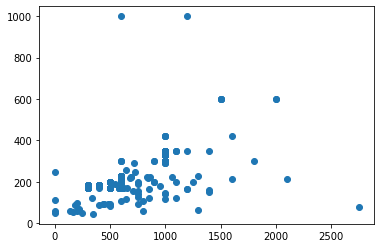

In [3]:
s = df_raw[df_raw.square_feet.notnull()].square_feet.values
p = df_raw[df_raw.square_feet.notnull()].price.str.replace('[\$,]', '', 
                                          regex=True).astype(float)
plt.scatter(s,p)

The square feet of a listing dictates the pricing of the listing to a certain degree based on the graph above. This is to be expected. We have decided to leave out the square feet in later modeling since more than 90% of its value is missing. Although we really want to include the variable given that it has a clear relationship with price, we cannot accept defaulting missing values to mean values. In doing so, we have to give mean square feet value to more than 90% of entries, this might eventually lead to unmeaningful or even false observations, rendering the variable unusable.

**Observation 2: price features are in string not float**

We will need to convert them to float to fit for our modeling

**Observation 3: high missing rate in multiple features**

We will need to drop thumbnail_url, host_acceptance_rate, medium_url, xl_picture_url, license, etc. These features all have more than 50% missing rate. They are all qualitative data. Meaning in a model like ours, they would not provide much value.

**Observation 4: some features such as is_location_exact, instant_bookable are boolean values**

We would need to reassign true/false values to numerical values to adapt them into our model.

***Missing Values Check:***

In [4]:
## Filter out the descriptive text and not relavent data.   , 'square_feet'

list_feature = ['host_since', 'host_response_time', # 'id',
               'host_response_rate', 'host_is_superhost',
               'host_neighbourhood', 'host_total_listings_count',
               'host_has_profile_pic', 'host_identity_verified',
               'is_location_exact', 'room_type','square_feet',
               'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
               'price', 'security_deposit', 'cleaning_fee',
               'guests_included', 'extra_people', 'maximum_nights', 
                'minimum_minimum_nights', 
                'has_availability', 'availability_30', 'availability_365', 
                'number_of_reviews', 'number_of_reviews_ltm', 
                'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                'review_scores_value', 'requires_license', 
                'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 
                'require_guest_profile_picture', 'require_guest_phone_verification', 
                'calculated_host_listings_count_entire_homes', 
                'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 
                'reviews_per_month']

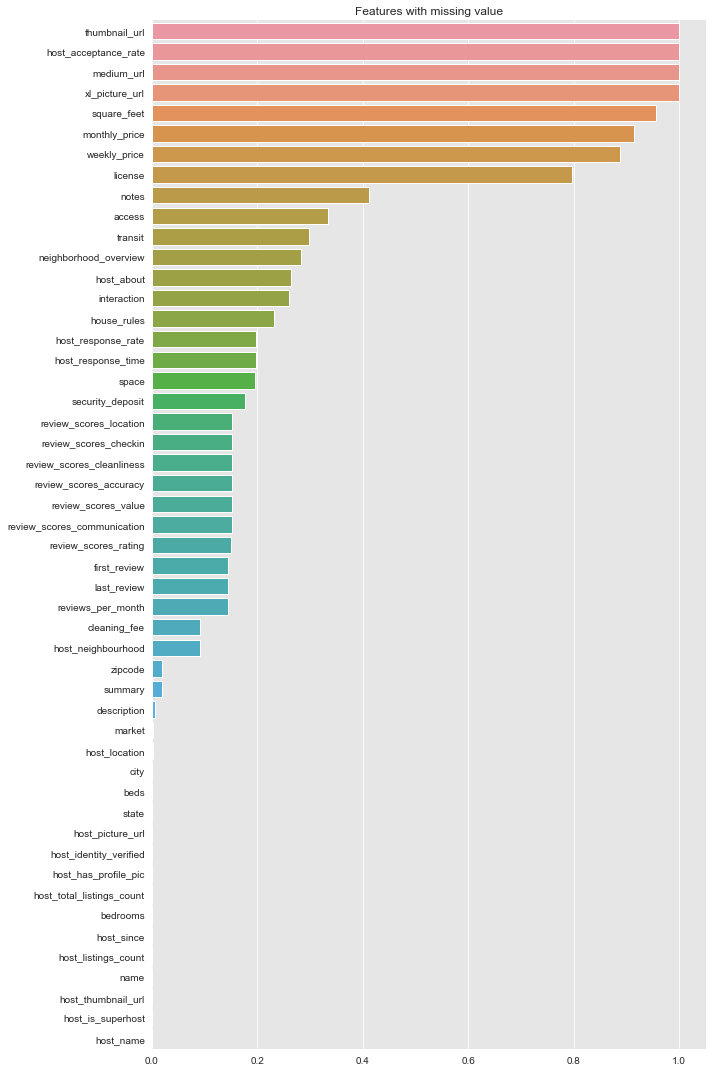

In [5]:
missing_ratio = df_raw.isnull().sum().sort_values(ascending=False)  / 7540
missing_name = df_raw.isnull().sum().sort_values(ascending=False).index

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig = plt.figure(figsize=(10,15))
sns.barplot(missing_ratio[missing_ratio>0], missing_name[missing_ratio>0])
sns.despine(left=True, bottom=True)
plt.title('Features with missing value')
plt.tight_layout()

### Check for linearity and reduce features.

- As for coinearity, here I set the threshold as 0.9, any pair with correlation higher than 0.9, I will remove one from the pair.

In [6]:
df_raw[list_feature].corr()

,host_total_listings_count,square_feet,accommodates,bathrooms,bedrooms,beds,guests_included,maximum_nights,minimum_minimum_nights,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
host_total_listings_count,1.000000,-0.076566,-0.044291,-0.020896,-0.079078,-0.085784,-0.031206,0.227161,0.128918,0.213903,0.305001,-0.191463,-0.199007,-0.218983,-0.234965,-0.042685,-0.285036,-0.270413,-0.028959,-0.203194,0.713736,-0.053426,-0.027936,-0.179721
square_feet,-0.076566,1.000000,0.579851,0.629771,0.644341,0.593355,0.652083,-0.022192,0.085363,-0.096675,-0.248214,-0.005999,-0.010407,0.056304,0.032547,0.010426,0.039734,-0.020861,0.011954,-0.008121,-0.097221,-0.117283,-0.117243,-0.056848
accommodates,-0.044291,0.579851,1.000000,0.539923,0.788797,0.768511,0.614460,0.027032,-0.029511,0.044298,0.039905,-0.032822,0.034790,0.031965,0.022372,0.017282,0.030685,0.021321,0.029916,-0.019085,-0.057083,-0.090252,-0.093987,0.002700
bathrooms,-0.020896,0.629771,0.539923,1.000000,0.605722,0.511548,0.352224,0.016172,0.038436,0.045733,0.022923,-0.096066,-0.075831,0.033237,0.013734,-0.043640,0.021888,0.001771,0.003150,-0.017809,-0.044997,-0.000748,0.199954,-0.124465
bedrooms,-0.079078,0.644341,0.788797,0.605722,1.000000,0.675798,0.533840,0.013002,0.024894,0.007602,-0.019481,-0.104153,-0.092704,0.075956,0.048914,0.012000,0.066940,0.051445,0.008399,0.024362,-0.085612,-0.092653,-0.056782,-0.149429
beds,-0.085784,0.593355,0.768511,0.511548,0.675798,1.000000,0.457263,-0.006447,-0.022405,0.024549,-0.006289,-0.049336,-0.005346,0.031796,0.015913,0.005618,0.047219,0.035208,0.032305,-0.008915,-0.112618,-0.062200,0.051205,-0.033439
guests_included,-0.031206,0.652083,0.614460,0.352224,0.533840,0.457263,1.000000,0.009426,-0.044515,0.070810,0.067966,0.021964,0.041481,0.012400,0.006899,0.015810,0.018217,-0.002108,0.018302,-0.021707,0.023460,-0.094095,-0.069494,-0.016708
maximum_nights,0.227161,-0.022192,0.027032,0.016172,0.013002,-0.006447,0.009426,1.000000,0.054652,0.039755,0.198510,-0.150271,-0.150075,-0.108912,-0.110961,-0.067410,-0.107768,-0.100582,-0.054452,-0.114795,0.249066,-0.140911,-0.007545,-0.143085
minimum_minimum_nights,0.128918,0.085363,-0.029511,0.038436,0.024894,-0.022405,-0.044515,0.054652,1.000000,0.049650,0.089346,-0.094279,-0.126005,0.028784,0.009688,-0.002596,0.020562,0.017567,-0.005208,0.009370,0.061621,-0.029538,-0.015878,-0.113027
availability_30,0.213903,-0.096675,0.044298,0.045733,0.007602,0.024549,0.070810,0.039755,0.049650,1.000000,0.517392,-0.014926,0.003775,-0.129894,-0.121948,-0.020633,-0.106643,-0.121198,-0.063006,-0.155244,0.329092,0.112942,0.137038,0.045011


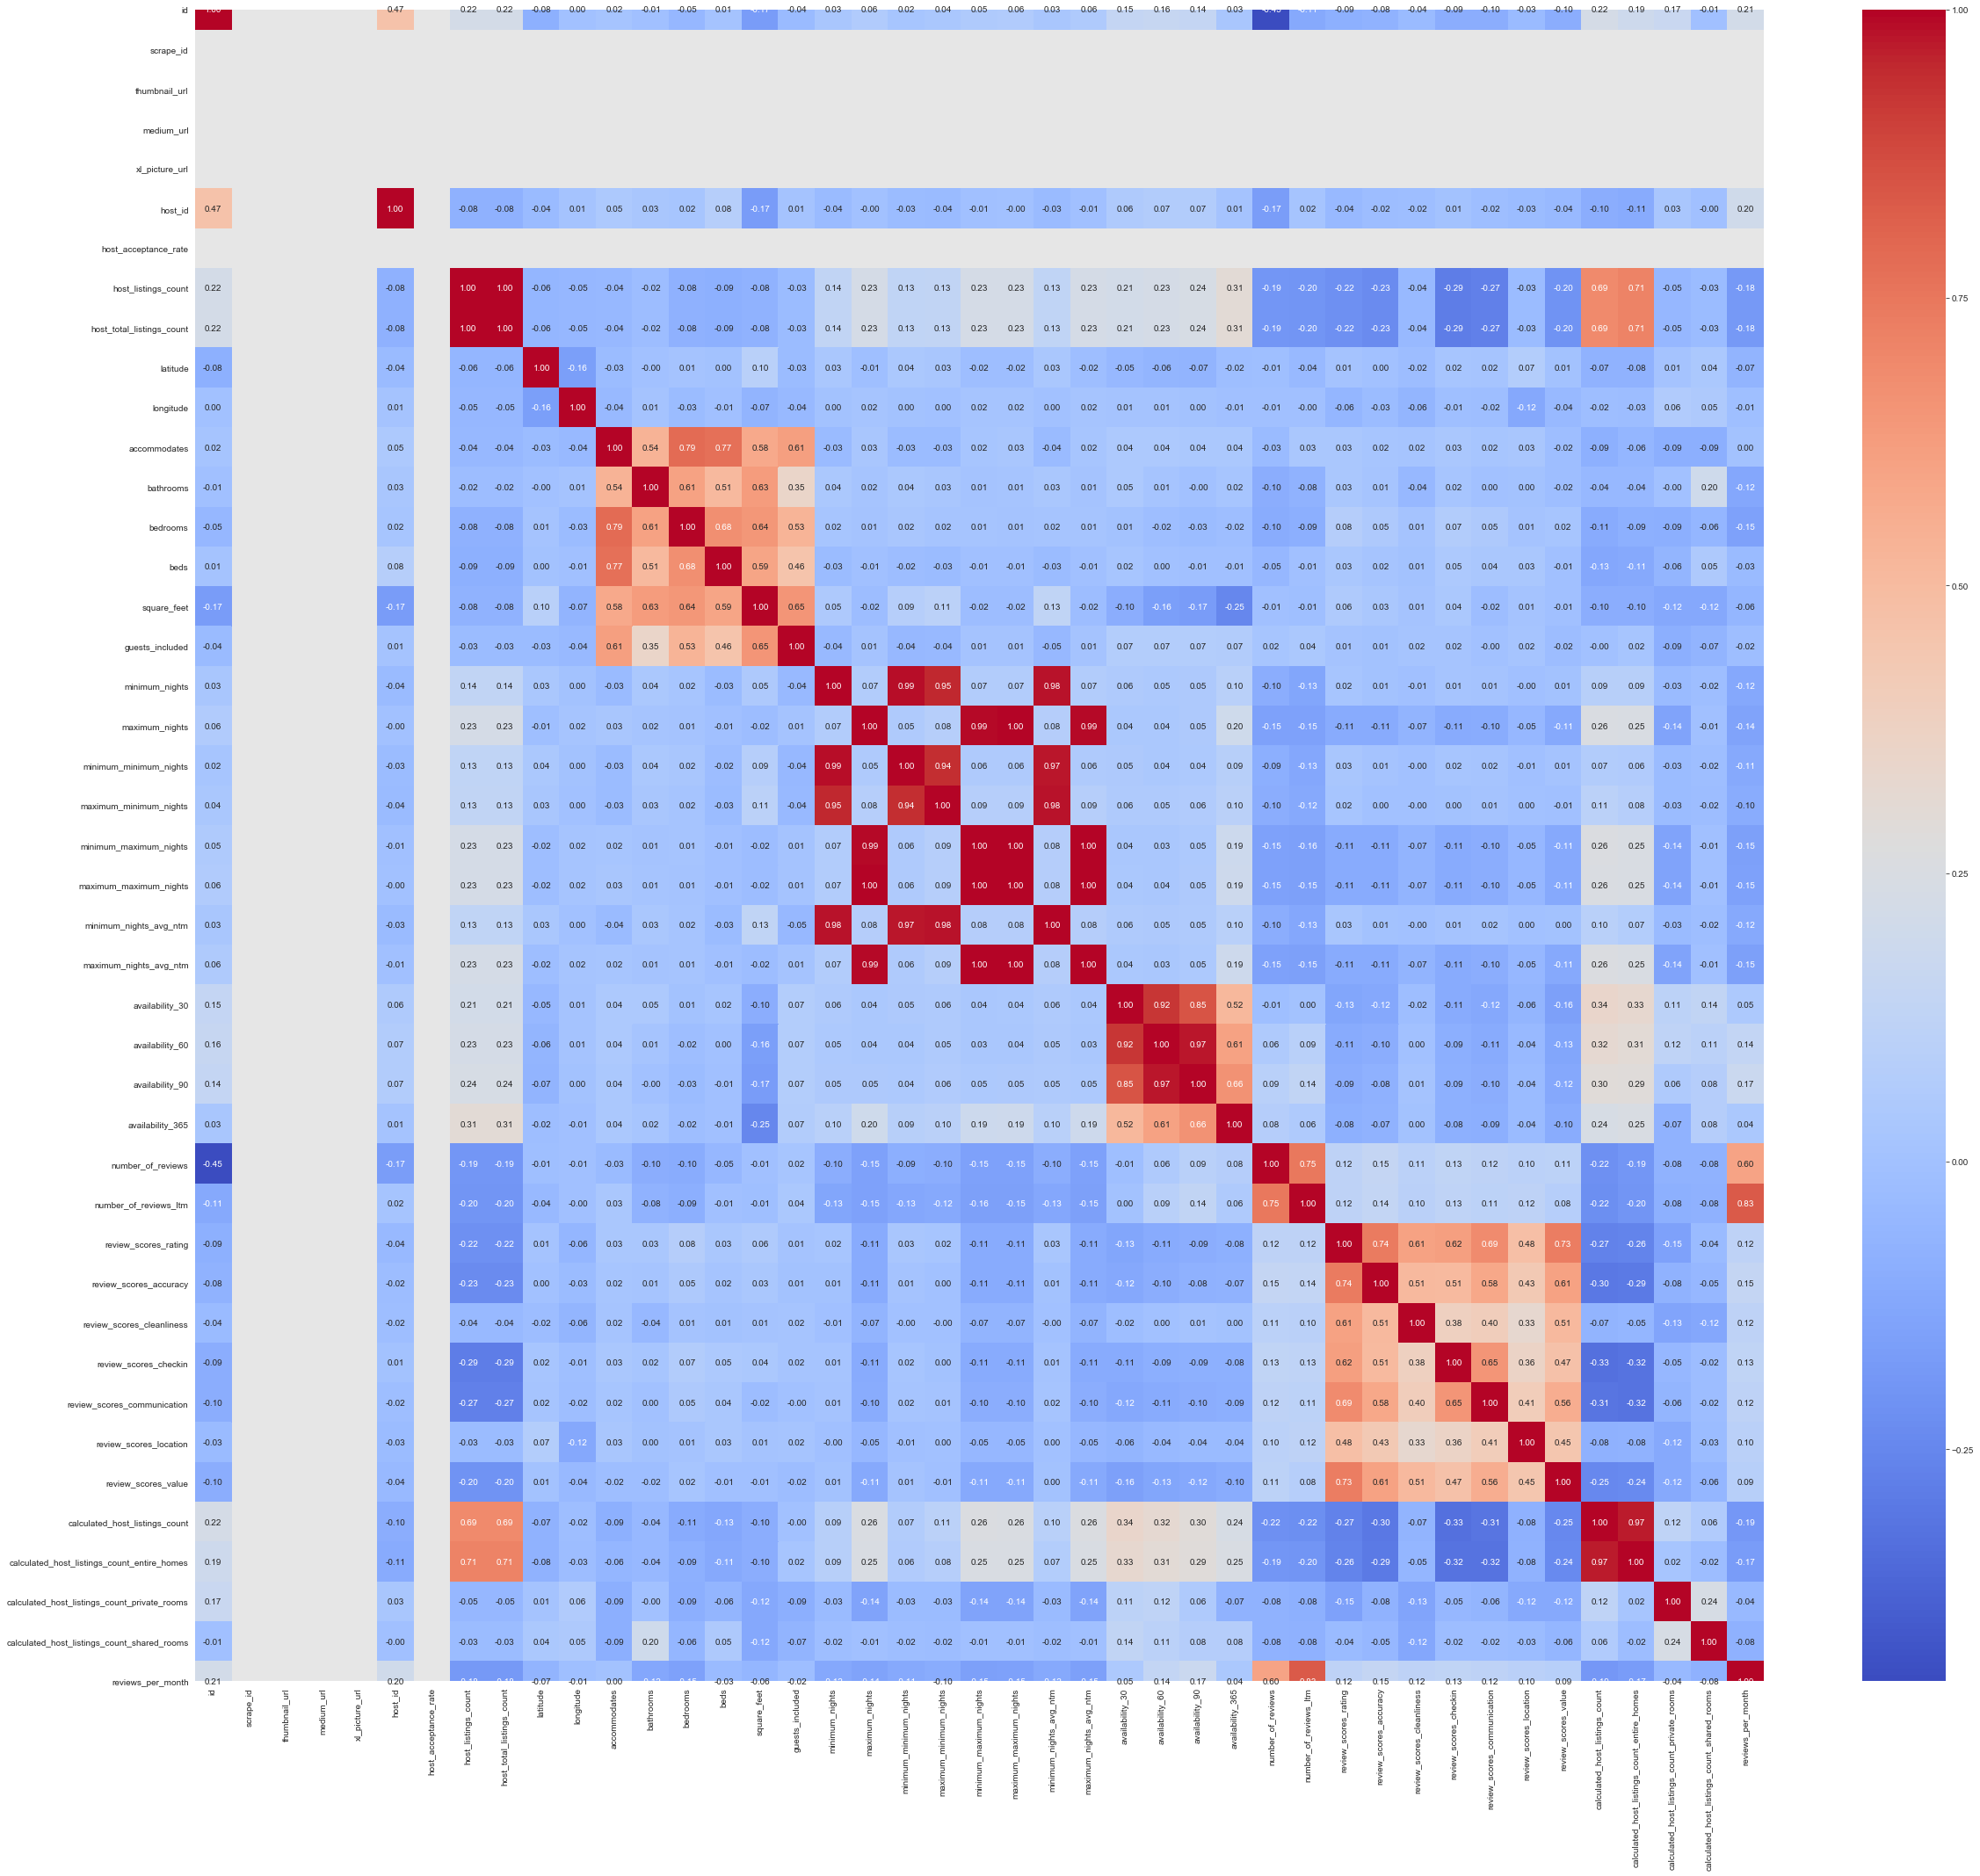

In [7]:
fig = plt.figure(figsize=(40,35))
sns.heatmap(df_raw.corr(),annot=True, 
            fmt = ".2f", cmap = "coolwarm")

In [8]:
# This is a recap of all features

print(list(df_raw.columns))
print(df_raw.shape)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

### 1.2 Consider how will you handle missing data. For instance, 95% of the "square feet" observations are missing, 17% of "security deposit" observations are missing. You loose too many observations if you just ignore those. ###
     
Three common way to deal with missing data: 
               
1. fillna()
2. dropna()
3. interpolate()
4. use other feature to preduict one particular feature
    
    
- Here, the square_feet is really important and the scatter plot 
    at the beginning can show us a clear relationship that bigger the room the higher the price. But over 90% of the square_feet info are missing, and I did not find good feature that could predict the square feet feature, so I decide to ignore it, to drop the feature.

- For other parts I decide to input them with mean.

### 1.3 Consider which variables you are going to use below. For all of these, create a summary table that contains relevant summary information. In particular pay attention to the missing values. Note that missings may not just be coded as such, they may also be empty strings and values like N/A. You may return to this point repeatedly as you develop your model. ###

10 steps below.

In [9]:
# this is a function used specifically for this dataframe.

def clean_this_data(df_raw):
    
    # Step 0. select features, filter out text and irrelavent features.
        
    list_feature = ['host_since', 'host_response_time', # 'id',
               'host_response_rate', 'host_is_superhost',
               'host_neighbourhood', 'host_total_listings_count',
               'host_has_profile_pic', 'host_identity_verified',
               'is_location_exact', 'room_type','square_feet',
               'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
               'price', 'security_deposit', 'cleaning_fee',
               'guests_included', 'extra_people', 'maximum_nights', 
                'minimum_minimum_nights', 
                'has_availability', 'availability_30', 'availability_365', 
                'number_of_reviews', 'number_of_reviews_ltm', 
                'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                'review_scores_value', 'requires_license', 
                'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 
                'require_guest_profile_picture', 'require_guest_phone_verification', 
                'calculated_host_listings_count_entire_homes', 
                'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 
                'reviews_per_month']

    
    df_raw = df_raw[list_feature]
    
    
    # Step 1. exchange text to float numbers using regex
    list_money_to_float = ['price','extra_people',  ## ,'monthly_price'
                        'security_deposit','cleaning_fee']
    for i in list_money_to_float:
        df_raw[i] = df_raw[i].str.replace('[\$,]', '', 
                                          regex=True).astype(float)
    # normalize: (x - mean) / standard deviation
    df_raw['security_deposit'] = (df_raw['security_deposit'] - 
                            np.mean(df_raw['security_deposit'])) / np.std(df_raw['security_deposit'])
    df_raw['cleaning_fee'] = (df_raw['cleaning_fee'] - 
                            np.mean(df_raw['cleaning_fee'])) / np.std(df_raw['cleaning_fee'])
    
        
    # Step 2. calculate how many days has been hosted, difference for date
    host_days =  pd.to_datetime('2019-11-29') - pd.to_datetime(df_raw['host_since'])
    df_raw['host_since'] = (host_days / np.timedelta64(1, 'D'))
    # normalize: (x - mean) / standard deviation
    df_raw['host_since'] = (df_raw['host_since'] - 
                            np.mean(df_raw['host_since'])) / np.std(df_raw['host_since'])
    
    
    
    # Step 3. 
    # responce_time -> the longer responce time, the higher the value.
    # within an hour:        1
    # within a few hours :   2
    # within a day:          3
    # a few days or more:    4
    # NaN:                   (mean of all)
    dict_1 = {
        'within an hour' : 1,
        'within a few hours': 2,
        'within a day': 3,
        'a few days or more': 4
    }
    df_raw['host_response_time'] = df_raw.host_response_time.map(dict_1)
    host_response_time_mean = np.mean(df_raw['host_response_time'])
    df_raw['host_response_time'] = df_raw['host_response_time'].fillna(host_response_time_mean)
    
    # Step 4.
    # feature: is_location_exact, instant_bookable, is_business_travel_ready
    #          requires_license
    # deal with boolean.
    # 't' -> 1
    # 'f' -> 0
    dict_2 = {
        'f':0,
        't':1
    }
    df_raw['host_is_superhost'] = df_raw['host_is_superhost'].map(dict_2)
    df_raw['host_has_profile_pic'] = df_raw['host_has_profile_pic'].map(dict_2)
    df_raw['host_identity_verified'] = df_raw['host_identity_verified'].map(dict_2)
    df_raw['is_location_exact'] = df_raw['is_location_exact'].map(dict_2)
    df_raw['instant_bookable'] = df_raw['instant_bookable'].map(dict_2)
    df_raw['is_business_travel_ready'] = df_raw['is_business_travel_ready'].map(dict_2)
    df_raw['has_availability'] = df_raw['has_availability'].map(dict_2)
    df_raw['requires_license'] = df_raw['requires_license'].map(dict_2)
    df_raw['require_guest_profile_picture'] = df_raw['require_guest_profile_picture'].map(dict_2)
    df_raw['require_guest_phone_verification'] = df_raw['require_guest_phone_verification'].map(dict_2)
    
    # Step 5. 
    # one-hot-encoding: 
    # Features: 1. host_neighbourhood,
    #           2. bed_type,
    #           3. cancellation_policy
    #           4. room_type
    df_raw = pd.get_dummies(df_raw, columns=['host_neighbourhood',
                                             'bed_type',
                                             'cancellation_policy',
                                             'room_type'])
    
    # Step 6. Feature: host_response_rate
    #    Example: Change 80% -> 0.8
    df_raw['host_response_rate'] = df_raw['host_response_rate'].fillna('0%').apply(lambda x: x[0:-1])
    host_response_rate_str = pd.to_numeric(df_raw['host_response_rate'])/100
    df_raw['host_response_rate'] = host_response_rate_str
    # replace 0 as mean of host_response_rate
    host_response_rate_mean = np.mean(host_response_rate_str)
    df_raw['host_response_rate'] = df_raw['host_response_rate'].map(lambda x: host_response_rate_mean if x == 0.0 else x)
    
    # now we have change all text to numerical numbers. 
    
    # Step 7: Input na with mean for square feet:
    #    Three common way to deal with missing data: 
    #             1: fillna()
    #             2: dropna()
    #             3: interpolate()
    
    # Steps here: 1. Imput with mean for large scale missing features > 5%.
    #             2. Drop the remaining missing. 
    
    
    # when a feature is missing more than 10, we input it with mean.
    features_fill_with_mean = df_raw.isnull().sum().sort_values(ascending=False)
    features_fill_with_mean = features_fill_with_mean[features_fill_with_mean>10].index
    for i in features_fill_with_mean:
        temp_fill_with_mean = np.mean(df_raw[i])
        df_raw[i] = df_raw[i].fillna(temp_fill_with_mean)
    
    # Step 8: Drop the remaining NA:
    #    The remaining missing data is in really small amount.
    #    drop the remaining small scale of missing data.
    df_raw = df_raw.dropna()
    
    # require_guest_phone_verification has linear relationship with another 
    # feature: require_guest_profile_picture, so I drop one of the features. 
    df_raw = df_raw.drop('require_guest_phone_verification', 1)
    
    # Step 9: drop outliers. 
    #       And 5 standard deviation will make sure 99.9 will be 
    #       included.
    std_price = np.std(df_raw.price)
    df_raw = df_raw[df_raw.price < 2.8* std_price]
    
    # Step 10: Drop the observation where price = 0, this makes no sense.
    
    price_0_list = list(df_raw[df_raw.price==0.0].index)
    df_raw = df_raw.drop(price_0_list)
    
    return df_raw
    

In [10]:
temp_df = clean_this_data(df_raw)
temp_df.isnull().sum().sort_values(ascending=False)

room_type_Shared room                           0
host_neighbourhood_Central Business District    0
host_neighbourhood_Downtown                     0
host_neighbourhood_Dawson                       0
host_neighbourhood_Da'an                        0
                                               ..
host_neighbourhood_Mount Baker                  0
host_neighbourhood_Montlake                     0
host_neighbourhood_Mission District             0
host_neighbourhood_Minor                        0
host_since                                      0
Length: 185, dtype: int64

- Check the skewness of the price. In normal case I will give a log to the price it is too skewed. But here, just to keep it simple, I will not use the log, the graph below is just for FYI.

Text(0.5, 1.0, 'Comparsion of price before log')

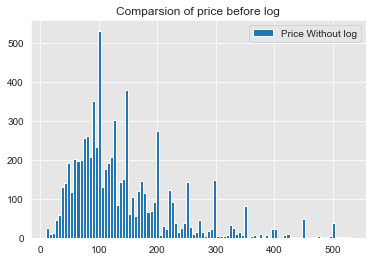

In [11]:
# check is p rice is skewed, and normalize it with a log 
plt.hist(temp_df.price.values, label='Price Without log',bins=100)
plt.legend()
plt.title('Comparsion of price before log')

Text(0.5, 1.0, 'Comparsion of price after log')

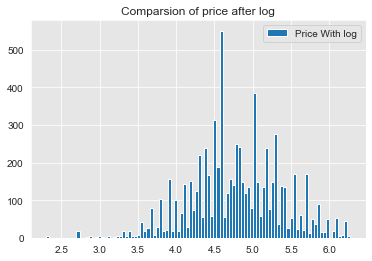

In [12]:
plt.hist(np.log(temp_df.price.values) ,label='Price With log', bins=100)
plt.legend()
plt.title('Comparsion of price after log')

In [13]:
np.log(temp_df.price.values)

array([5.69035945, 3.87120101, 4.12713439, ..., 3.55534806, 3.55534806,
       4.78749174])

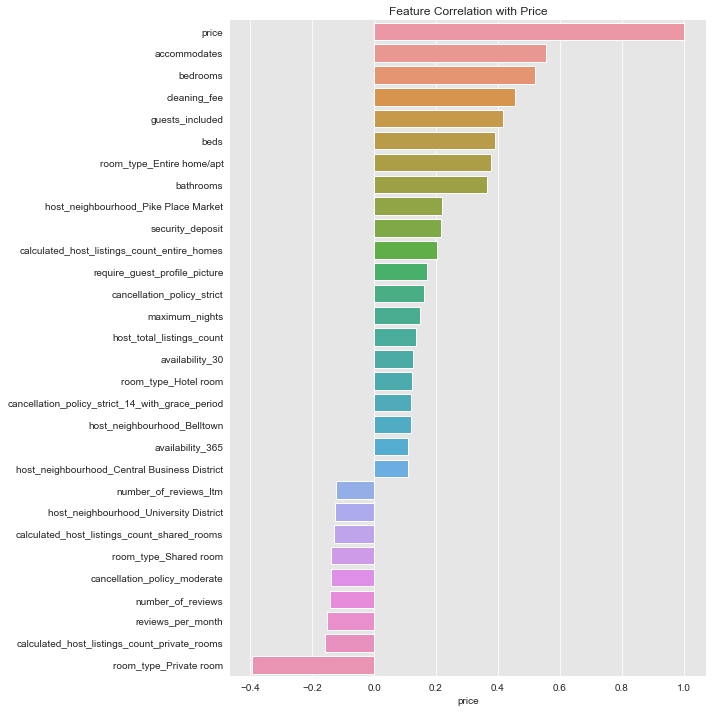

In [14]:
# check feature corr with price, return a list of feature and the 
# corresponding corrlation with price
def data_corr_with_price(temp_df):
    ipr = temp_df.corr().price.sort_values(ascending=False)[:]
    ipr = ipr[abs(ipr)>0.1]
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    fig = plt.figure(figsize=(10,10))
    sns.barplot(ipr, ipr.index)
    sns.despine(left=True, bottom=True)
    plt.title('Feature Correlation with Price')
    plt.tight_layout()
    return ipr
    
ipr = data_corr_with_price(temp_df)

In [15]:
# check the data after cleaned
temp_df

,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,square_feet,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,maximum_nights,minimum_minimum_nights,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_neighbourhood_Ala Moana/Kakaako,host_neighbourhood_Alki,host_neighbourhood_Anaheim,host_neighbourhood_Arbor Heights,host_neighbourhood_Atlantic,host_neighbourhood_Ballard,host_neighbourhood_Belltown,host_neighbourhood_Bitter Lake,host_neighbourhood_Brighton,host_neighbourhood_Broadview,host_neighbourhood_Broadway,host_neighbourhood_Brookline,host_neighbourhood_Bryant,host_neighbourhood_Buckman,host_neighbourhood_Cambridge,host_neighbourhood_Capitol Hill,host_neighbourhood_Cedar Park,host_neighbourhood_Central Business District,host_neighbourhood_Central City,host_neighbourhood_Central District,host_neighbourhood_Chinatown,host_neighbourhood_Columbia City,host_neighbourhood_Cory - Merrill,host_neighbourhood_Crown Hill,host_neighbourhood_Da'an,host_neighbourhood_Dawson,host_neighbourhood_Downtown,host_neighbourhood_Downtown Brooklyn,host_neighbourhood_Downtown Seattle,host_neighbourhood_Dunlap,host_neighbourhood_Earls Court,host_neighbourhood_East Village,host_neighbourhood_Eastlake,host_neighbourhood_Fauntleroy,host_neighbourhood_First Hill,host_neighbourhood_Five Points,host_neighbourhood_Fort Greene,host_neighbourhood_Franklin,host_neighbourhood_Fremont,host_neighbourhood_Garden District,host_neighbourhood_Gatewood,host_neighbourhood_Genesee,host_neighbourhood_Georgetown,host_neighbourhood_Green Lake,host_neighbourhood_Greenwood,host_neighbourhood_Haller Lake,host_neighbourhood_Harrison/Denny-Blaine,host_neighbourhood_Hell's Kitchen,host_neighbourhood_High Point,host_neighbourhood_Highland Park,host_neighbourhood_Holly Park,host_neighbourhood_Hollywood,host_neighbourhood_Hollywood Hills,host_neighbourhood_Huntington Beach,host_neighbourhood_Incline Village,host_neighbourhood_Industrial District,host_neighbourhood_Interbay,host_neighbourhood_International District,host_neighbourhood_Junction,host_neighbourhood_Junius Heights,host_neighbourhood_K Street,host_neighbourhood_Kaanapali,host_neighbourhood_Kauaʻi,host_neighbourhood_Kingsbury,host_neighbourhood_LB of Islington,host_neighbourhood_Laurelhurst,host_neighbourhood_Leschi,host_neighbourhood_Licton Springs,host_neighbourhood_Little Italy,host_neighbourhood_Lower Queen Anne,host_neighbourhood_Madison Park,host_neighbourhood_Madrona,host_neighbourhood_Magnolia,host_neighbourhood_Maple Leaf,host_neighbourhood_Mathews Beach,host_neighbourhood_Meadowbrook,host_neighbourhood_Midtown,host_neighbourhood_Minor,host_neighbourhood_Mission District,host_neighbourhood_Montlake,host_neighbourhood_Mount Baker,host_neighbourhood_Newport Beach,host_neighbourhood_North Admiral,host_neighbourhood_North Beach/Blue Ridge,host_neighbourhood_North Beacon Hill,host_neighbourhood_North Delridge,host_neighbourhood_Northeast Seattle,host_neighbourhood_Olympic Hills,host_neighbourhood_Palermo,host_neighbourhood_Petworth,host_neighbourhood_Phinney Ridge,host_neighbourhood_Pike Place Market,host_neighbourhood_Pinehurst,host_neighbourhood_Pioneer Square,host_neighbourhood_Portage Bay,host_neighbourhood_Potrero Hill,host_neighbourhood_Presidio,host_neighbourhood_Queen Anne,host_neighbourhood_Rainier Beach,host_neighbourhood_Rainier View,host_neighbourhood_Ravenna,host_neighbourhood_Riverview,host_neighbourhood_Roose

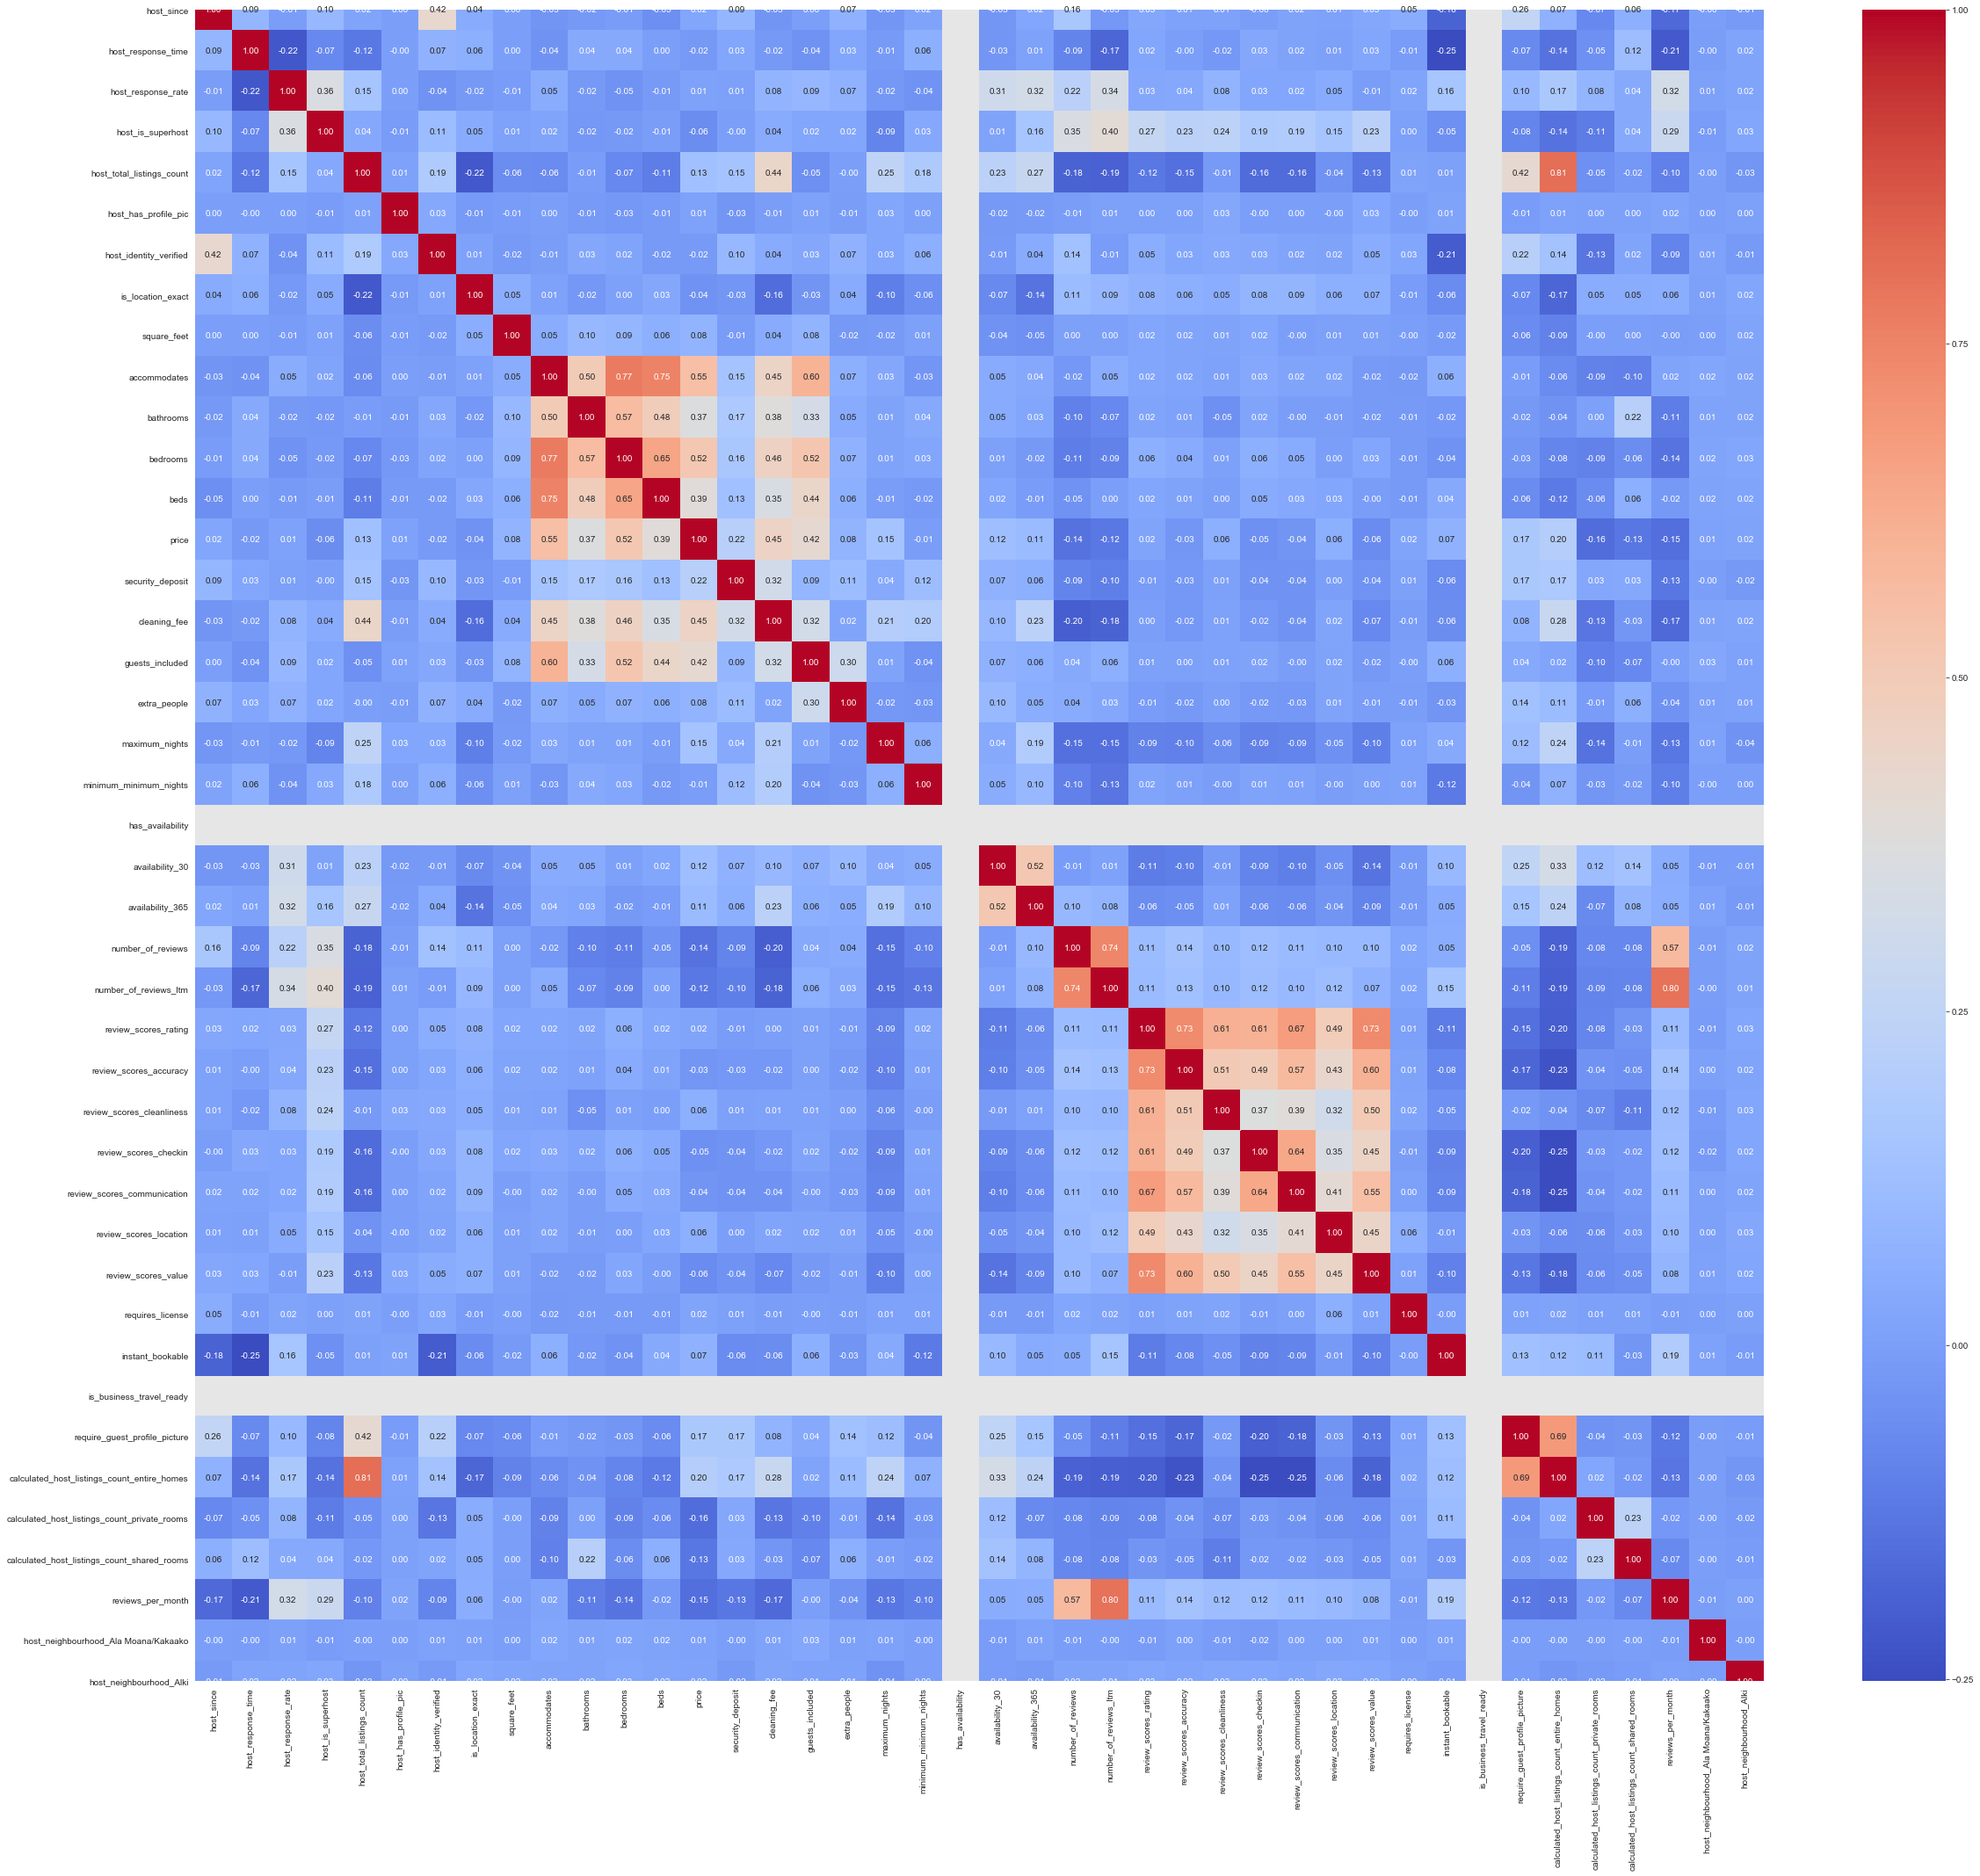

In [16]:
# recheck the correlation and colinearity.
temp_corr = temp_df.iloc[:,:42].corr()

fig = plt.figure(figsize=(40,35))

sns.heatmap(temp_corr,annot=True, 
            fmt = ".2f", cmap = "coolwarm")

## 2. Model ##

1. R2
2. Cross Validation

### 2.1 Either split your data into training and validation sets, or just use cross validation below. ###

In [17]:
X_training_df = temp_df.drop('price', 1) # [ipr.index]

shape_row = np.matrix(X_training_df).shape[0]

X_origin = np.array(X_training_df)
y_origin = temp_df.price.values
y_origin = np.array(y_origin).reshape((-1,1))

print('True Price: ')
print(y_origin[:10])

True Price: 
[[296.]
 [ 48.]
 [ 62.]
 [ 99.]
 [165.]
 [125.]
 [120.]
 [125.]
 [299.]
 [ 40.]]


### 2.2 Develop the models. Report all the variables and how do you clean/encode those. While the exact details are visible in the code, explain the broad choices in text. ###

In [19]:
X = X_origin[:,:]
y = y_origin
beta_temp = pinv(X.T @ X) @ X.T @ y_origin

print('Predicted Price: ')
print((X @ beta_temp)[:10])
RMSE = np.sqrt(np.mean(((X @ beta_temp) - y)**2))
print()
print('RMSE: ', RMSE)

Predicted Price: 
[[332.21580417]
 [ 41.72414544]
 [ 49.69714926]
 [ 93.42619411]
 [208.13803267]
 [163.39729777]
 [120.19976575]
 [243.70735298]
 [248.6311184 ]
 [ 81.55508399]]

RMSE:  55.417381456735804


Text(0.5, 1.0, 'Histogram of True value and predicted')

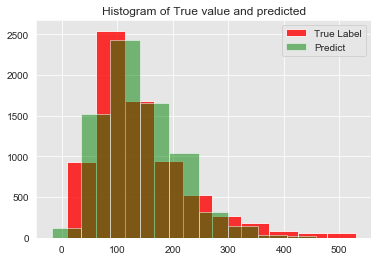

In [20]:
plt.hist(y, color='r', alpha = 0.8, label='True Label')
plt.hist(X @ beta_temp, color='g', alpha=0.5, label = 'Predict')
plt.legend()
plt.title('Histogram of True value and predicted')

In [56]:
max(beta_temp)

array([177.56251892])

### Check p-value

In [133]:
# p values to select features.
# import stats
from scipy import stats

def p_value_for_one_col(feature,beta_obs, RMSE):
    n = len(feature)
    Se = np.sqrt(RMSE**2)
    Sxx = sum((np.array(feature)-np.mean(feature))**2)
    t = (beta_obs-0) / (Se/(np.sqrt(Sxx)))
    
    upper_bound = beta_obs + 2.86*(Se/(np.sqrt(Sxx)))
    lower_bound = beta_obs - 2.86*(Se/(np.sqrt(Sxx)))
    print('Observed beta: ', beta_obs, 't: ',t)
    print('Lower: ',lower_bound, 'Upper: ', upper_bound)
    pval = stats.t.sf(np.abs(t), n-1)*2
    
    return pval
    

In [134]:
drop_base_on_p = []
pval = []
beta_p = []

for i in range(X_training_df.shape[1]):
    p = p_value_for_one_col(X_training_df.iloc[:,i], 
                            beta_temp[i], 55)
    print('Feature: ', X_training_df.columns[i], ', P value: ', p)
    print()
    if (p > 0.05):
        drop_base_on_p.append(X_training_df.columns[i])
        pval.append(p)
        beta_p.append(beta_temp[i])



Observed beta:  [1.07660161] t:  [1.66529087]
Lower:  [-0.77237304] Upper:  [2.92557627]
Feature:  host_since , P value:  [0.09589782]

Observed beta:  [1.44628241] t:  [1.02189825]
Lower:  [-2.60144711] Upper:  [5.49401194]
Feature:  host_response_time , P value:  [0.30686306]

Observed beta:  [-35.6375809] t:  [-5.08986578]
Lower:  [-55.66236853] Upper:  [-15.61279327]
Feature:  host_response_rate , P value:  [3.67304886e-07]

Observed beta:  [1.27402084] t:  [0.9779804]
Lower:  [-2.45171803] Upper:  [4.9997597]
Feature:  host_is_superhost , P value:  [0.32811655]

Observed beta:  [0.08760844] t:  [42.83542949]
Lower:  [0.08175908] Upper:  [0.09345781]
Feature:  host_total_listings_count , P value:  [0.]

Observed beta:  [40.77592396] t:  [1.96056396]
Lower:  [-18.70652333] Upper:  [100.25837124]
Feature:  host_has_profile_pic , P value:  [0.04996803]

Observed beta:  [-3.90953199] t:  [-3.01882971]
Lower:  [-7.61337175] Upper:  [-0.20569224]
Feature:  host_identity_verified , P valu

Observed beta:  [-41.22067073] t:  [-6.41426961]
Lower:  [-59.60017852] Upper:  [-22.84116294]
Feature:  host_neighbourhood_Cory - Merrill , P value:  [1.50366003e-10]

Observed beta:  [-37.06117073] t:  [-3.55875218]
Lower:  [-66.84547235] Upper:  [-7.27686911]
Feature:  host_neighbourhood_Crown Hill , P value:  [0.000375]

Observed beta:  [29.15819406] t:  [1.06000631]
Lower:  [-49.51344578] Upper:  [107.8298339]
Feature:  host_neighbourhood_Da'an , P value:  [0.28917694]

Observed beta:  [-5.39401049] t:  [-0.24012948]
Lower:  [-69.63797533] Upper:  [58.84995436]
Feature:  host_neighbourhood_Dawson , P value:  [0.81023665]

Observed beta:  [23.67400132] t:  [0.43040679]
Lower:  [-133.63681526] Upper:  [180.98481789]
Feature:  host_neighbourhood_Downtown , P value:  [0.66691251]

Observed beta:  [-103.13592896] t:  [-1.87506977]
Lower:  [-260.44674553] Upper:  [54.17488762]
Feature:  host_neighbourhood_Downtown Brooklyn , P value:  [0.06082317]

Observed beta:  [-41.58320838] t:  [-0

Observed beta:  [-7.26525459] t:  [-0.32343315]
Lower:  [-71.50921943] Upper:  [56.97871026]
Feature:  host_neighbourhood_Tillow , P value:  [0.74637653]

Observed beta:  [14.38177799] t:  [0.26146889]
Lower:  [-142.92903858] Upper:  [171.69259456]
Feature:  host_neighbourhood_Truckee , P value:  [0.79373834]

Observed beta:  [-4.42849853] t:  [-0.08051262]
Lower:  [-161.7393151] Upper:  [152.88231804]
Feature:  host_neighbourhood_Tzafon Yashan , P value:  [0.93583178]

Observed beta:  [12.70102564] t:  [0.32653623]
Lower:  [-98.54216956] Upper:  [123.94422084]
Feature:  host_neighbourhood_U Street Corridor , P value:  [0.74402808]

Observed beta:  [-17.47235291] t:  [-5.09473347]
Lower:  [-27.28070297] Upper:  [-7.66400286]
Feature:  host_neighbourhood_University District , P value:  [3.5802493e-07]

Observed beta:  [-35.3627451] t:  [-2.87144328]
Lower:  [-70.58456258] Upper:  [-0.14092763]
Feature:  host_neighbourhood_Victory Heights , P value:  [0.00409783]

Observed beta:  [-29.96

In [135]:
pd.DataFrame({'Feature' : drop_base_on_p, 
              'beta': beta_p,
              'P_val' : (pval)}).sort_values(by='P_val', 
                                             ascending=False)[:20]

,Feature,beta,P_val
46,host_neighbourhood_Kaanapali,[-2.76631416614969e-13],[1.0]
4,has_availability,[-84.11215794009158],[1.0]
9,is_business_travel_ready,[-3.127348952212882e-12],[1.0]
28,host_neighbourhood_Fauntleroy,[0.026729732575189402],[0.9981433386616924]
52,host_neighbourhood_Little Italy,[-0.9184966531266383],[0.9866773699384204]
81,host_neighbourhood_Westchester/Playa Del Rey,[1.9199464007461842],[0.9606331687774219]
74,host_neighbourhood_The Castro,[2.845689358995358],[0.9587402746213267]
78,host_neighbourhood_Tzafon Yashan,[-4.428498528466648],[0.935831776401204]
27,host_neighbourhood_Eastlake,[-0.7124182790778821],[0.9184694635538312]
34,host_neighbourhood_Hell's Kitchen,[3.718927725056318],[0.9067906286261793]


### 2.3 (a) a simple one that only contains a few most important variables/best predictors. What do you think are 2-3 best predictors in the data? ###

Cross Validation and R Square evaluation

n fold cv

In [23]:
# this is a method for n folds cross validation.

def cv_result(X_origin, y_origin, n_fold):
    row_number = (X_origin.shape[0] / n_fold)
    RMSE_list = []
    R2 = []
    beta_list = np.zeros((X_origin.shape[1], 1))

    for i in range(1,n_fold+1):
        start = int(row_number *(i-1))
        end = int(row_number * i)
        x_train = np.vstack((X_origin[0:start,:], 
                             X_origin[end:X_origin.shape[0],:]))
        X_test = X_origin[start:end,:]
        
        y_train = np.vstack((y_origin[0:start,:], 
                             y_origin[end:y_origin.shape[0],:]))
        y_test = y_origin[start:end,:]
        
        beta = pinv(x_train.T @ x_train) @ x_train.T @ y_train
        beta_list += beta
        RMSE = np.sqrt(np.mean(((X_test @ beta) - y_test)**2))
        print('RMSE: ', RMSE)
        RMSE_list.append(RMSE)
        R2.append(r2result(X_test, y_test, beta))
        

    print()
    print('Average RMSE: ')
    print(np.mean(RMSE_list))
    print('Average R2: ')
    print(np.mean(R2))
    return beta_list / n_fold

# compute the adjusted R2 score.
def r2result(X_origin, y_origin, beta):
    X = X_origin[:,:]
    y = y_origin[:,:]
    beta = pinv(X.T @ X) @ X.T @ y

    y_mean = np.mean(y)
    SSunexp = sum((y - X @ beta)**2)   # variability came from residue
    SSexp = sum((X @ beta - y_mean)**2)
    SST = sum((y - y_mean)**2)

    n = X.shape[0]
    k = X.shape[1]

    # compute the adjusted R2 
    R2 = 1 - (SSunexp / (n-k-1))/(SST/n-1)
    print('R2 score is :' ,R2)
    
    return R2

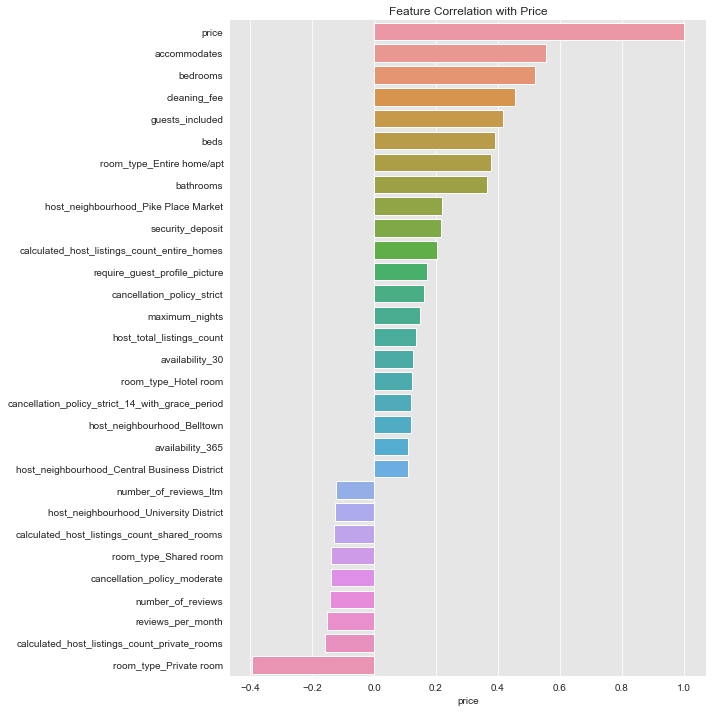

In [24]:
ipr = data_corr_with_price(temp_df=temp_df)

In [25]:
# ipr stands for importance, meaning the corrlation with price.
# select feature that has top corrlation with price
feature_simple = list(ipr[abs(ipr)>0.2].index[1:])[:4]

X_training_df = temp_df.drop('price', 1) # [ipr.index]

shape_row = np.matrix(X_training_df[feature_simple]).shape[0]

X_origin = np.array(X_training_df[feature_simple])
y_origin = temp_df.price.values
y_origin = np.array(y).reshape((-1,1))

beta = cv_result(X_origin, y_origin, n_fold=5)

#r2result(X_origin, y_origin, beta=beta)

# show features coef
col = list(X_training_df[feature_simple].columns.values)
pd.DataFrame({'col' : col, 
              'coef' : list(beta)}).sort_values(by='coef')[:10]

RMSE:  65.18610031495663
R2 score is : [0.41258471]
RMSE:  75.16210502426708
R2 score is : [0.33729574]
RMSE:  76.33800632006394
R2 score is : [0.29165075]
RMSE:  86.58306265775327
R2 score is : [0.04879724]
RMSE:  81.51993169610853
R2 score is : [0.1117952]

Average RMSE: 
76.9578412026299
Average R2: 
0.24042472797985512


,col,coef
2,cleaning_fee,[3.7372420991941673]
3,guests_included,[9.28917713026467]
1,bedrooms,[21.128248592763406]
0,accommodates,[22.095725731415712]


### 2.3 (b) the full model: everything you consider useful. ###

In [26]:
X_training_df = temp_df.drop('price', 1) # [ipr.index]
shape_row = np.matrix(X_training_df).shape[0]

X_origin = np.array(X_training_df)
y_origin = temp_df.price.values
y_origin = np.array(y).reshape((-1,1))

beta = cv_result(X_origin, y_origin, n_fold=10)
beta_final = beta
# show features coef
col = list(X_training_df.columns.values)
# store the coef into a dataframe and easier to check afterwards.
feature_coef = pd.DataFrame({'col' : col, 
              'coef' : list(beta)}).sort_values(by='coef')
pd.DataFrame({'col' : col, 
              'coef' : list(beta)}).sort_values(by='coef')[:20]

RMSE:  54.415567012393765
R2 score is : [0.59130883]
RMSE:  59.74820166165821
R2 score is : [0.57225448]
RMSE:  60.66155100128436
R2 score is : [0.57106016]
RMSE:  53.13547093772538
R2 score is : [0.6598141]
RMSE:  58.50711698117531
R2 score is : [0.54894597]
RMSE:  50.72645054346734
R2 score is : [0.76234648]
RMSE:  70.89730393453007
R2 score is : [0.50770614]
RMSE:  57.763679109877025
R2 score is : [0.56889182]
RMSE:  55.729868317462184
R2 score is : [0.60427841]
RMSE:  62.6686125954199
R2 score is : [0.64306149]

Average RMSE: 
58.42538220949935
Average R2: 
0.6029667886162002


,col,coef
134,host_neighbourhood_Potrero Hill,[-181.18734670293688]
57,host_neighbourhood_Central City,[-139.89861359840572]
75,host_neighbourhood_Fort Greene,[-94.22781916512551]
66,host_neighbourhood_Downtown Brooklyn,[-92.38833565343144]
70,host_neighbourhood_East Village,[-85.21865908731375]
19,has_availability,[-85.10307078492366]
183,room_type_Shared room,[-78.41480024751095]
178,cancellation_policy_super_strict_30,[-74.25904120810267]
125,host_neighbourhood_Northeast Seattle,[-73.71456530077035]
147,host_neighbourhood_South Beacon Hill,[-56.157156784370216]


In [27]:
col = list(X_training_df.columns.values)
pd.DataFrame({'col' : col, 
              'coef' : list(beta)}).sort_values(by='coef', ascending=False)[:20]

,col,coef
161,host_neighbourhood_Waianae Coast,[159.81800759668565]
164,host_neighbourhood_West Loop/Greektown,[113.03859267790904]
78,host_neighbourhood_Garden District,[64.51879237548086]
103,host_neighbourhood_LB of Islington,[60.63549196601925]
56,host_neighbourhood_Central Business District,[59.296130339763025]
146,host_neighbourhood_South Beach,[59.06443455478027]
101,host_neighbourhood_Kauaʻi,[58.676264544563125]
94,host_neighbourhood_Industrial District,[53.8676115316625]
59,host_neighbourhood_Chinatown,[52.29584796554069]
130,host_neighbourhood_Pike Place Market,[51.4071463409922]


Text(0.5, 1.0, 'Histogram of True value and predicted')

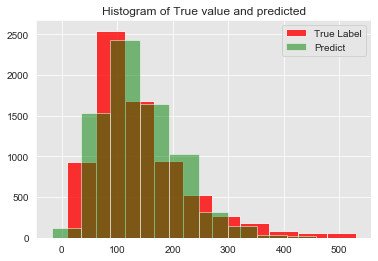

In [28]:
plt.hist(y_origin, color='r', alpha = 0.8, label='True Label')
plt.hist(X_origin @ beta, color='g', alpha=0.5, label = 'Predict')
plt.legend()
plt.title('Histogram of True value and predicted')

### 2.3 (c) somewhere in between. ###

In [29]:
# ipr stands for importance, meaning the corrlation with price.

feature_simple = list(ipr[abs(ipr)>0.2].index[1:])[:42]

X_training_df = temp_df.drop('price', 1) # [ipr.index]

shape_row = np.matrix(X_training_df[feature_simple]).shape[0]

X_origin = np.array(X_training_df[feature_simple])
y_origin = temp_df.price.values
y_origin = np.array(y).reshape((-1,1))

beta = cv_result(X_origin, y_origin, n_fold=5)

# show features coef
col = list(X_training_df[feature_simple].columns.values)
pd.DataFrame({'col' : col, 
              'coef' : list(beta)}).sort_values(by='coef')[:10]

RMSE:  59.617463236216615
R2 score is : [0.54998737]
RMSE:  64.03770671371808
R2 score is : [0.54808745]
RMSE:  61.415202908329995
R2 score is : [0.56891642]
RMSE:  75.84576640934827
R2 score is : [0.25612802]
RMSE:  76.20514850892796
R2 score is : [0.36100938]

Average RMSE: 
67.42425755530817
Average R2: 
0.45682572814699796


,col,coef
4,beds,[-3.1077484675805707]
9,calculated_host_listings_count_entire_homes,[0.07592749433214083]
8,security_deposit,[3.8887494254611275]
3,guests_included,[4.143706218363409]
2,cleaning_fee,[7.738638553204018]
0,accommodates,[9.034633179528331]
10,room_type_Private room,[12.756225422700098]
1,bedrooms,[19.746767569931954]
6,bathrooms,[21.430081841551445]
5,room_type_Entire home/apt,[56.884875923602905]


### 2.4 Interpret the coeffcients of the reported models. Again, only interpret the most interesting/important ones, not all of those! Do the coeffcient values differ between the models? Can you explain why? ###

***Answer:***

As you can see below, all analysis about featuers should look at: *Coeffcients from full model. *Feature Correlation with price.

1. Negative factors on price:
    1. has_availability: This is really interesting, but we could think about it this way. A listing is avaliable maybe because nobody wants to rent it.
    2. room_type_Shared room: This is intuitive. Like carpools, shared rooms would be cheaper.
    3. beds: this is intuitive because more beds usually means more expenses.
2. Positive factors on price:
    1. requires_license: One way to understand this is, if a listing requires license, it may be because the house is expensive, and the househost does not want accomendate some random people with no reliable background info.
    2. bedrooms: This is to be expected. The larger the space is, the more it will likely to cost.
3. The coefficients do differ from models. When fitting the model, with more predictors, the effects from one predict will decrease.

price                                              1.000000
accommodates                                       0.554451
bedrooms                                           0.520785
cleaning_fee                                       0.453709
guests_included                                    0.416542
beds                                               0.391658
room_type_Entire home/apt                          0.376721
bathrooms                                          0.365910
host_neighbourhood_Pike Place Market               0.219141
security_deposit                                   0.216447
calculated_host_listings_count_entire_homes        0.203905
require_guest_profile_picture                      0.172031
cancellation_policy_strict                         0.160702
maximum_nights                                     0.148596
host_total_listings_count                          0.133871
availability_30                                    0.124693
room_type_Hotel room                    

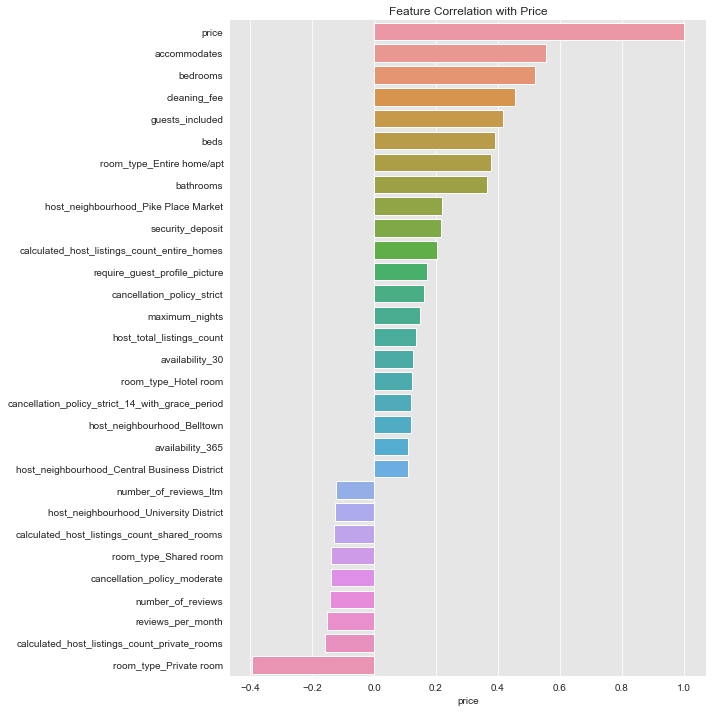

In [30]:
# see corrlation with price again
data_corr_with_price(temp_df=temp_df)

### 2.5 Use your models to predict the price. Report RMSE in the table above. ###

- Detailed computaion please see 2.3

## 3. Think

### 3.1 does your model do a good job in predicting the prices? ###

Based on our R2 score, I think our model does a relatively good job predicting the prices. Our R2 values vary from 0.33 to 0.59 across three models. Ideally, we could aim for even higher R2 values. But given the chaotic nature of the dataset, the current R2 values are quite acceptable.

### 3.2 how will your model be useful to ###
**(a) AirBnB hosts**

- Prospective AirBnB hosts could potentially use our model to predict certain rooms/spaces of their own before making the decision to re-purpose them for AirBnB. Since our model can predict to some accuracy the prices of their spaces, they could use the model to predict how much money they will make. Therefore, if they are debating whether or not they should rent their places via AirBnB, they now have the extra information to aid their decision-making process.

- For current AirBnB hosts, our model can also aid them in deciding how much they should charge for their places. The hosts can use our model to predict how much some certain places will be charged on AirBnB. They can use this information to price their listings in a price range they are confident in.

**(b) AirBnB customers**

As for AirBnB customers, I think our model is best used for them to verify the pricing of certain listings that they are interested in renting. For example, it may be hard for customers to compare the pricing of listings in an area where AirBnB listings are scarce. I.e., they may not be able to see similar listings within an area and thus may not be able to tell whether or not the lisitng they are looking at is priced fairly or not. Our model can help them to predict the pricing of the listing. If the listing is **significantly more expensive** than our prediction, it is worth considering the listing may be over-priced and vice versa.

### 3.3 Did you include any other price-related variables, such as "weekly price" or "security deposit" in your model? Do you think it is a good idea to use these attributes while trying to predict price? ###

**Yes and no**, we did include variables such as security deposit and cleaning fee and we did not include weekly fee and monthly fee. 
- We think that 1) weekly and monthly fees show colinearity. Therefore, even if we were to keep the variables, we only need to keep one of them. 2) Weekly and monthly fees both have more than 80% of **missing** values. If we were to fill all N/A values with the mean, we would probably end up with unmeaningful feature or even a false one. In short, we think it is the best for us to drop the two of them.
- As for variables such as security deposit and cleaning fee, we decide to keep them and fill in the N/A values with the mean. Although the two also had some missing values, they only compose to less than 20% of total entries. They also don't show colinearity with anything else. It is therefore reasonable to keep them around.

### 3.4 Do you think this model can be used by Airbnb itself or the government?

Based on the R2 values we have right now, I don't think the model is good enough for serious governmental or financial decision-making processes. For AirBnB and the government, I think it is better for them to develop their own model, possibly one with even more features in it. AirBnB has access to more features than it publishes to the public and it should take advantage of this and develop a model with **higher accuracy (higher R2 values)**. For the government, I would suggest them to do the same.

### 3.5 Do you see any ethical issues with this work?

- For every day uses, the model may be very useful to predict the prices of certain listings. Customers may use this model to justify not paying the extra dollars for some seemingly over-priced listings. However, in many cases, there dozens more factors that may contribute to the premium prices of these 'over-priced' listings. For example, a listing may be more expensive because the owner has put much more efforts in **renovating the rooms, replacing old apparatus, and/or making sure the rooms are secure and clean**. Unfortunately for the model, we do **not** have access to these data but we should all agree that many more factors are not in discussion when we apply the model. Therefore, tagging some listings as over-priced based on our prediction may fall into the trap of being unethical.
- Another ethical issue is also closely related to our prediction model. Pricing of places vary **dramatically** over the course of a year. It is unfortunate that we do not have a time axis in our model because we do not have access to the data via AirBnB. Generally, this would not be a problem. But if someone decides to use our model during times like Christmas, Thanksgiving, etc. He or she may find the pricing of listings to be globally more expensive than our predicted prices. The pricing difference would be even **greater** if he or she is looking to rent a place in some popular destinations during holidays. In this case, the definition of fair pricing changes because of popularity in some area and it may very much vary from one neighborhood to another. Our model is, therefore, not able to predict prices correctly.

## 4. Additional task
### 4.1 load the testing data arbnb-seattle-listings-test.csv. This has exactly the same structure and variables as the original dataset.

In [31]:
# function to run the testing data 

def run_test(df_raw, beta):
    temp_df = clean_this_data(df_raw)
    
    X_training_df = temp_df.drop('price', 1) # [ipr.index]
    shape_row = np.matrix(X_training_df).shape[0]

    X_origin = np.array(X_training_df)
    y_origin = temp_df.price.values
    y_origin = np.array(y).reshape((-1,1))

    RMSE = np.sqrt(np.mean(((X_origin @ beta) - y_origin)**2))
    print('RMSE: ', RMSE)
    a = r2result(X_origin, y_origin, beta)


In [32]:
# this is the features of the final model.

feature_coef[np.abs(feature_coef.coef)>80].sort_values(by='coef', 
                                               ascending=False)

,col,coef
161,host_neighbourhood_Waianae Coast,[159.81800759668565]
164,host_neighbourhood_West Loop/Greektown,[113.03859267790904]
19,has_availability,[-85.10307078492366]
70,host_neighbourhood_East Village,[-85.21865908731375]
66,host_neighbourhood_Downtown Brooklyn,[-92.38833565343144]
75,host_neighbourhood_Fort Greene,[-94.22781916512551]
57,host_neighbourhood_Central City,[-139.89861359840572]
134,host_neighbourhood_Potrero Hill,[-181.18734670293688]


In [53]:
# this is the result for the final model.
df_test_raw = pd.read_csv('airbnb-seattle-listings-test.csv.bz2',sep='\t')
run_test(df_raw, beta_final)

RMSE:  55.42029760603741
R2 score is : [0.58896634]


### 4.2 compute RMSE on the testing dataset. This is the ultimate goodness measure of your model. Present it prominently in your report.

### RMSE: 55.42029760603741

### 4.3 Do not tinker with the model any more. This was your final test.

**Note: you may still have to fix coding errors if there is something wrong so you cannot compute RMSE on the test data.**